In [ ]:
#Clustering: Hierarchical 
#Dataset : hitters.csv 
 
#Apply Data pre-processing (Label Encoding , Data Transformation….) techniques if necessary. 
#Apply Hierarchical clustering algorithms (based on CRuns column) to find the group of players. 

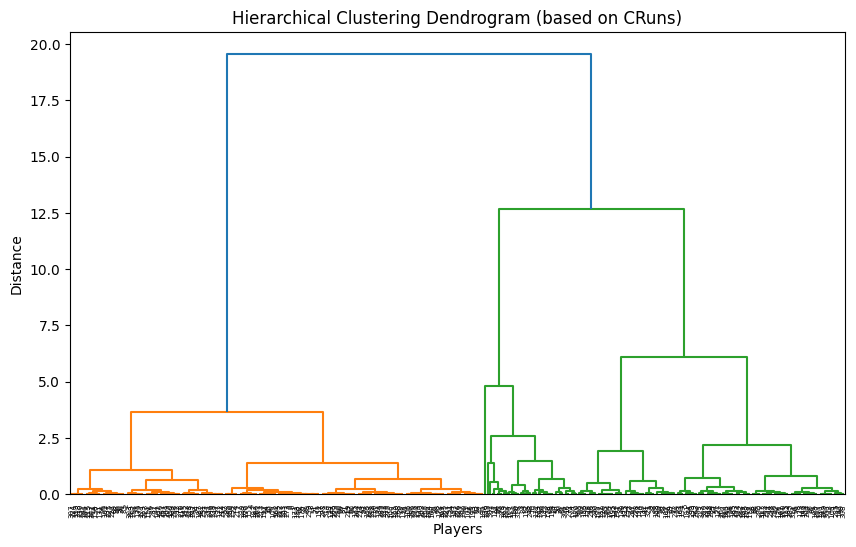

   CRuns  Cluster
0     30        1
1    321        3
2    224        1
3    828        2
4     48        1
5    501        3
6     30        1
7     41        1
8     32        1
9    784        3


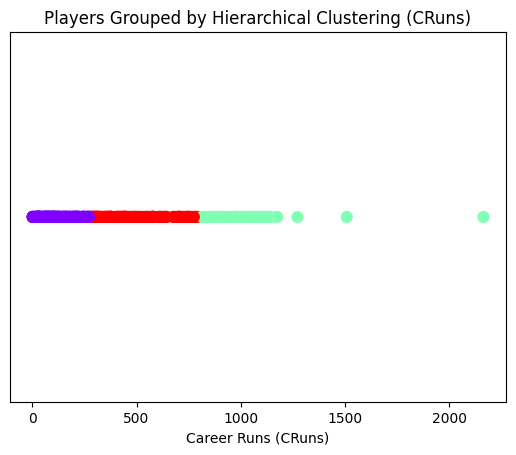

In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Step 2: Load dataset
data = pd.read_csv("hitters.csv")

# Step 3: Handle missing values
data = data.dropna(subset=['CRuns'])

# Step 4: Encode categorical columns
le = LabelEncoder()
for col in ['League', 'Division', 'NewLeague']:
    data[col] = le.fit_transform(data[col])

# Step 5: Select feature for clustering
X = data[['CRuns']]

# Step 6: Standardize the feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Apply Hierarchical Clustering
Z = linkage(X_scaled, method='ward')

# Step 8: Plot full dendrogram (not truncated)
plt.figure(figsize=(10, 6))
dendrogram(Z) #if want trancated : add ,truncate_mode='lastp'
plt.title("Hierarchical Clustering Dendrogram (based on CRuns)")
plt.xlabel("Players")
plt.ylabel("Distance")
plt.show()

# Step 9: Form 3 clusters
clusters = fcluster(Z, 3, criterion='maxclust')
data['Cluster'] = clusters

# Step 10: Display results
print(data[['CRuns', 'Cluster']].head(10))

# Step 11: Visualize clusters
plt.scatter(data['CRuns'], [0]*len(data), c=data['Cluster'], cmap='rainbow', s=60)
plt.xlabel("Career Runs (CRuns)")
plt.title("Players Grouped by Hierarchical Clustering (CRuns)")
plt.yticks([])
plt.show()


   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N  

--- Missing Values ---
AtBat         0
Hits       

C:\Users\saris\AppData\Local\Temp\ipykernel_31392\710845597.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CRuns'].fillna(data['CRuns'].mean(), inplace=True)


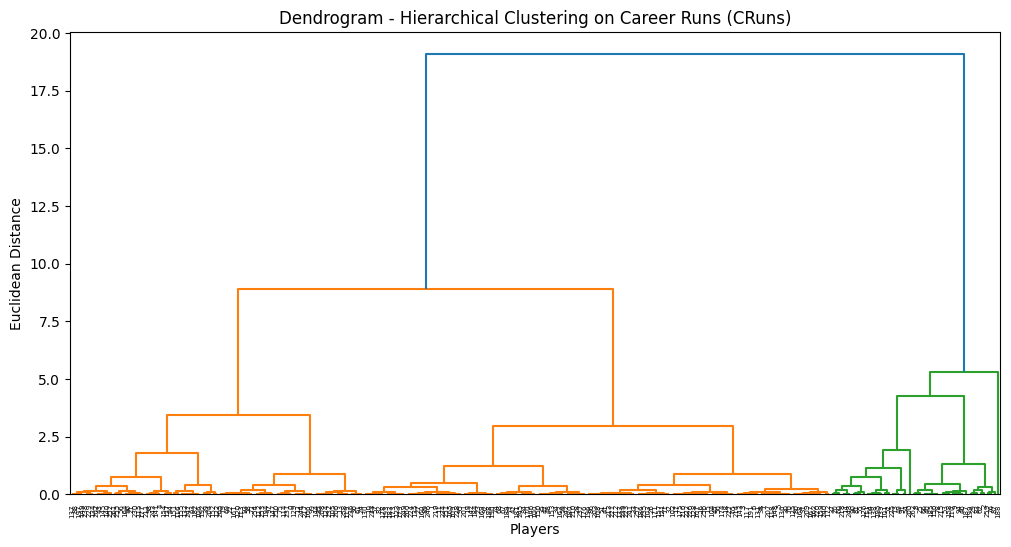


--- Cluster Summary ---
   Cluster        mean  min   max  count
0        1  943.187500  676  2165     48
1        2  118.810606    2   250    132
2        3  410.180723  262   643     83


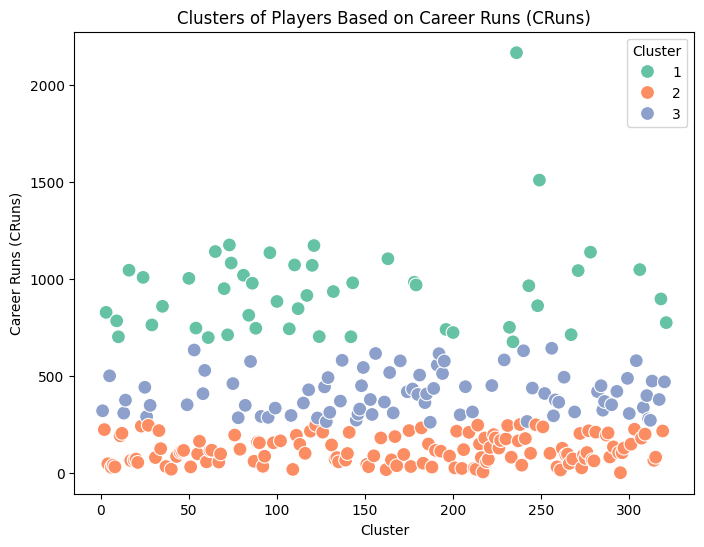


--- Sample Clustered Data ---
    CRuns  Cluster
1     321        3
2     224        2
3     828        1
4      48        2
5     501        3
6      30        2
7      41        2
8      32        2
9     784        1
10    702        1
11    192        2
12    205        2
13    309        3
14    376        3
16   1045        1


In [ ]:
#  Hierarchical Clustering: Grouping Baseball Players Based on Career Runs (CRuns)

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Step 2: Load Dataset
df = pd.read_csv("hitters.csv") 
print(df.head())

# Step 3: Check for Missing Values
print("\n--- Missing Values ---")
print(df.isnull().sum())

# Step 4: Data Preprocessing
# Drop rows with missing Salary values
df.dropna(subset=['Salary'], inplace=True)

# Encode categorical columns
label_enc = LabelEncoder()
for col in ['League', 'Division', 'NewLeague']:
    df[col] = label_enc.fit_transform(df[col])

# Step 5: Select Relevant Feature
data = df[['CRuns']].copy()

# Handle any missing values in CRuns (if present)
data['CRuns'].fillna(data['CRuns'].mean(), inplace=True)

# Step 6: Feature Scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['CRuns']])

# Step 7: Perform Hierarchical Clustering
linked = linkage(data_scaled, method='ward')  # Ward minimizes variance within clusters

# Step 8: Plot Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title("Dendrogram - Hierarchical Clustering on Career Runs (CRuns)")
plt.xlabel("Players")
plt.ylabel("Euclidean Distance")
plt.show()

# Step 9: Form Clusters (for example, 2 clusters)
num_clusters = 3
data['Cluster'] = fcluster(linked, num_clusters, criterion='maxclust')

# Step 10: Cluster Summary
cluster_summary = data.groupby('Cluster')['CRuns'].agg(['mean', 'min', 'max', 'count']).reset_index()
print("\n--- Cluster Summary ---")
print(cluster_summary)

# Step 11: Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x=data.index, y='CRuns', hue='Cluster', palette='Set2', s=100)
plt.title("Clusters of Players Based on Career Runs (CRuns)")
plt.xlabel("Index")
plt.ylabel("Career Runs (CRuns)")
plt.legend(title="Cluster")
plt.show()

# Step 12: Display Sample Data with Clusters
print("\n--- Sample Clustered Data ---")
print(data.head(15))
